# APK

In [1]:
import pandas as pd
import ipywidgets as widgets
import json
from joblib import load
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
from IPython.display import clear_output

In [2]:
mushrooms = pd.read_csv('data/mushrooms.csv')

In [3]:
img_poisonous=mpimg.imread('poisonous.jpg')
img_correct=mpimg.imread('edible.jpg')

def plt_results(predicted): 
    img = img_correct if predicted else img_poisonous
    imgplot = plt.imshow(img)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [4]:
descr_dict = json.load(open('descr_dict.json'))
# descr_dict

In [5]:
loaded_model = load('model.joblib')
loaded_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [6]:
def column_options_dropdown(column_name):
    options = []
    for option,symbol in descr_dict[column_name].items():
        options.append(option)

    feat_widget = widgets.Dropdown(description=column_name + ': ', options=options)

    return feat_widget
  

In [7]:
widget_list = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'veil-color']
feat_widgets = {}
for w in widget_list:
    feat_widgets[w] = column_options_dropdown(w)

HTML(value='<h1>MUSHROOMS APP</h1>')

Dropdown(description='cap-shape: ', options=('bell', 'conical', 'convex', 'flat', 'knobbed', 'sunken'), value=…

Dropdown(description='cap-surface: ', options=('fibrous', 'grooves', 'scaly', 'smooth'), value='fibrous')

Dropdown(description='cap-color: ', index=1, options=('brown', 'buff', 'cinnamon', 'gray', 'green', 'pink', 'p…

Dropdown(description='bruises: ', index=1, options=('bruises', 'no'), value='no')

Dropdown(description='veil-color: ', options=('brown', 'orange', 'white', 'yellow'), value='brown')

Button(button_style='info', description='Check mushroom', icon='check', style=ButtonStyle(), tooltip='Click me…

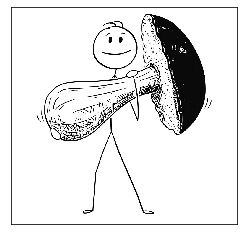

In [9]:
button = widgets.Button(
    description='Check mushroom',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check'
)
button.on_click(run_model)

def display_app():
    hello = widgets.HTML(
        value="<h1>MUSHROOMS APP</h1>"
    )
    display(hello)
    for _, w in feat_widgets.items():
        display(w)
    display(button)

def run_model(self):
    clear_output()
    display_app()
    #tworzy df z wybranymi cechami jako dummy data i wypełnia zerami
    model_df = pd.DataFrame(columns = pd.get_dummies(mushrooms[widget_list]).columns)
    model_df.loc[0] = [0]*len(model_df.columns)
    
    chosen_options = {}
    for _, w in feat_widgets.items():
        chosen_options[w.description]=w.value
        #uzupełnia jedynką w tym miejscu, gdzie mamy wybraną wartość cechy
        model_df.loc[0, (w.description).strip().replace(':', "") + "_" + descr_dict[(w.description).strip().replace(':', "")][w.value]] = 1
#     print(chosen_options)
#     print('Podajemy do modelu:')
#     print(model_df)
    y_pred = loaded_model.predict(model_df)
    plt_results(predicted=y_pred[0])
    return  y_pred
    
    


display_app()